In [1]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
from iris import *
from iris.analysis import *
from iris.analysis.cartography import *
from collections.abc import Iterable, Mapping
import operator
import iris.coords
import iris.exceptions
from numpy import *
from iris.coord_categorisation import *

In [2]:
path = '/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/Models/dissertation_script/IPSL/fgco2_Omon_IPSL-CM6A-LR_ssp370_r1i1p1f1_gn_201501-210012-2.nc'
my_cube = iris.load(path)
print(my_cube)

0: cell_area / (m2)                    (-- : 332; -- : 362)
1: surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (time: 1032; -- : 332; -- : 362)


/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'fgco2'
  warnings.warn(


In [3]:
cell_area = my_cube[0]
print(cell_area)

cell_area / (m2)                    (-- : 332; -- : 362)
    Attributes:
        CMIP6_CV_version            cv=6.2.3.5-2-g63b123e
        Conventions                 CF-1.7 CMIP-6.2
        EXPID                       ssp370
        activity_id                 ScenarioMIP AerChemMIP
        branch_method               standard
        branch_time_in_child        0.0
        branch_time_in_parent       60265.0
        contact                     ipsl-cmip6@listes.ipsl.fr
        creation_date               2018-12-18T20:37:48Z
        data_specs_version          01.00.28
        description                 Future scenario with high radiative forcing by the end of century. Reaches...
        dr2xml_md5sum               c2dce418e78ca835be1e2ff817c2c403
        dr2xml_version              1.16
        experiment                  gap-filling scenario reaching 7.0 based on SSP3
        experiment_id               ssp370
        external_variables          areacello
        forcing_index    

In [5]:
fgco2 = my_cube[1]
print(fgco2)

surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (time: 1032; -- : 332; -- : 362)
    Dimension coordinates:
        time                                                                         x          -         -
    Auxiliary coordinates:
        latitude                                                                     -          x         x
        longitude                                                                    -          x         x
    Scalar coordinates:
        depth                                                                   0.0 m
    Cell methods:
        mean where sea                                                          area
        mean                                                                    time
    Attributes:
        CMIP6_CV_version                                                        cv=6.2.3.5-2-g63b123e
        Conventions                                                             CF-1.7 CMIP-6

surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (-- : 332; -- : 362)
    Auxiliary coordinates:
        latitude                                                                    x         x
        longitude                                                                   x         x
    Scalar coordinates:
        depth                                                                   0.0 m
        time                                                                    2015-01-16 12:00:00, bound=(2015-01-01 00:00:00, 2015-02-01 00:00:00)
    Cell methods:
        mean where sea                                                          area
        mean                                                                    time
    Attributes:
        CMIP6_CV_version                                                        cv=6.2.3.5-2-g63b123e
        Conventions                                                             CF-1.7 CMIP-6.2
        EXPID     

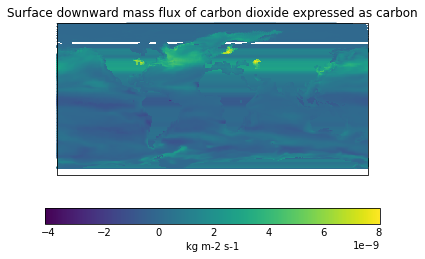

In [58]:
# three coords time, lat, lon
lat_long_data_from_1st_time_step = fgco2[0,:,:]
lat_long_data_from_2nd_time_step = fgco2[2,:,:]
time_long_data_from_1st_latitude_step = fgco2[:,0,:]
time_lat_data_from_1st_litudeong_step = fgco2[:,:,0]
siconc_at_time_zero = fgco2[0,:,:]
print(siconc_at_time_zero)
qplt.pcolormesh(siconc_at_time_zero)

In [77]:
print('All times :\n' + str(fgco2.coord('time')))
# Define a function which accepts a datetime as its argument (this is simplified in later examples).
hour_11 = iris.Constraint(time=lambda cell: cell.point.hour == 11)
cube_11 = fgco2.extract(hour_11)
print('Selected times :\n' + str(fgco2.coord('time')))

All times :
DimCoord([2015-01-16 12:00:00, 2015-02-15 00:00:00, 2015-03-16 12:00:00, ...,
       2100-10-16 12:00:00, 2100-11-16 00:00:00, 2100-12-16 12:00:00], bounds=[[2015-01-01 00:00:00, 2015-02-01 00:00:00],
       [2015-02-01 00:00:00, 2015-03-01 00:00:00],
       [2015-03-01 00:00:00, 2015-04-01 00:00:00],
       ...,
       [2100-10-01 00:00:00, 2100-11-01 00:00:00],
       [2100-11-01 00:00:00, 2100-12-01 00:00:00],
       [2100-12-01 00:00:00, 2101-01-01 00:00:00]], standard_name='time', calendar='gregorian', long_name='Time axis', var_name='time', attributes={'time_origin': '2015-01-01 00:00:00'})
Selected times :
DimCoord([2015-01-16 12:00:00, 2015-02-15 00:00:00, 2015-03-16 12:00:00, ...,
       2100-10-16 12:00:00, 2100-11-16 00:00:00, 2100-12-16 12:00:00], bounds=[[2015-01-01 00:00:00, 2015-02-01 00:00:00],
       [2015-02-01 00:00:00, 2015-03-01 00:00:00],
       [2015-03-01 00:00:00, 2015-04-01 00:00:00],
       ...,
       [2100-10-01 00:00:00, 2100-11-01 00:00:00],
 

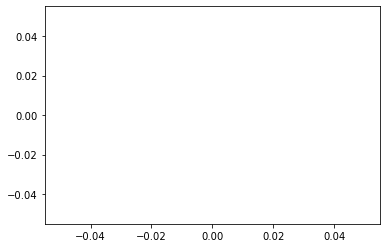

In [38]:
lat = -75
lon = -175

plt.plot(fgco2[:,lat,lon].data)

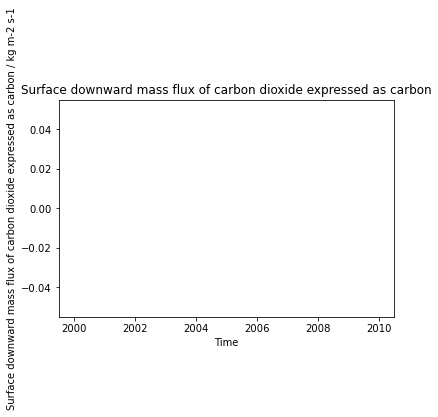

In [39]:
qplt.plot(fgco2[:,lat,lon])

In [11]:
for coord in fgco2.coords():
    print(coord.name())

time
depth
latitude
longitude
